In [1]:
%matplotlib inline

In [49]:
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.python.ops import math_ops
from preprocessing import vgg_preprocessing as prep

In [50]:
# Load an image
img_size    = 224
img_path    = './images/dog.jpeg'
img_file    = tf.read_file(img_path)
img_decoded = tf.image.decode_jpeg(img_file, channels=3)
mean_rgb    = [124, 117, 104]

img_float = tf.to_float(img_decoded)
print "image shape:"
print img_float.shape

image shape:
(?, ?, 3)


In [59]:
# RGB -> BGR: SPLIT & CONCAT
channels_split  = tf.split(axis=2, num_or_size_splits=3, value=img_decoded)
print "split shape:"
print("[{},{},{}]".format(channels_split[0].shape, channels_split[1].shape, channels_split[2].shape))

channels_split = [channels_split[2], channels_split[1], channels_split[0]]
img_split = tf.concat(axis=2, values=channels_split)

split shape:
[(?, ?, 1),(?, ?, 1),(?, ?, 1)]


In [60]:
# # RGB -> BGR: UNSTACK & STACK
channels_unstack = tf.unstack(img_float, axis=2)
print "unstack shape:"
print("[{},{},{}]".format(channels_unstack[0].shape, channels_unstack[1].shape, channels_unstack[2].shape))

img_stack = tf.stack([channels_unstack[2], channels_unstack[1], channels_unstack[0]], axis=2)

unstack shape:
[(?, ?),(?, ?),(?, ?)]


In [61]:
with tf.Session() as sess:
    img, img_split, img_stack = sess.run([img_decoded, img_split, img_stack])

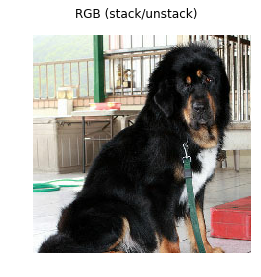

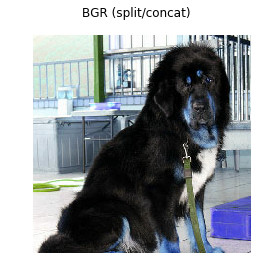

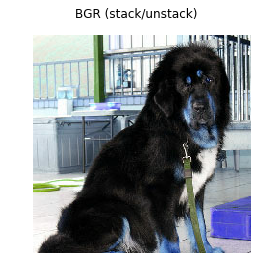

In [62]:
    plt.figure()
    plt.imshow(img.astype(np.uint8))
    plt.suptitle("RGB")
    plt.axis('off')
    plt.show()
    
    plt.figure()
    plt.imshow(img_split.astype(np.uint8))
    plt.suptitle("BGR (split/concat)")
    plt.axis('off')
    plt.show()
    
    plt.figure()
    plt.imshow(img_stack.astype(np.uint8))
    plt.suptitle("BGR (stack/unstack)")
    plt.axis('off')
    plt.show()